## Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**


In [5]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data Filter Warning Libraries
import warnings 
warnings.filterwarnings('ignore')

#Import Data Logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 2:

**Data Uploading using Pandas Function**

In [6]:
#Load the dataset

url='https://raw.githubusercontent.com/Saimehtre18/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
403,356.0,119.0,0.0,160.0,9.0,1061.0,657.0,28,59.00
419,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,14,16.88
610,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
52,237.5,237.5,0.0,228.0,0.0,932.0,594.0,90,33.12
520,284.0,15.0,141.0,179.0,5.5,842.0,801.0,3,13.40
...,...,...,...,...,...,...,...,...,...
748,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,7,33.21
561,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,28,33.08
454,250.0,0.0,95.7,191.8,5.3,948.9,857.2,56,39.64
146,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30


## Step 3:

**Doing Exploratory Data Analysis [EDA] :-->**

1. Univariate Analysis

2. Bi Variate Analysis

In [7]:
#Performing Univariate Analysis

from collections import OrderedDict

stats=[]

for i in df.columns:
    numerical_stats= OrderedDict({
        'Feature':i,
        'Type':df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Standard deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR' : df[i].quantile(0.75)-df[i].quantile(0.25),
    })
    
    stats.append(numerical_stats)
    
df_stats = pd.DataFrame(stats)
df_stats
# df_stats.style.background_gradient(subset=['Missing','Mean','Mode','IQR','Kurtosis','Min','Max','Type','Unique','Median','Standard deviation','Skewness'],cmap='Reds')


,Feature,Type,Missing,Unique,Mode,Mean,Median,Min,Max,Standard deviation,Skewness,Kurtosis,IQR
0,cement,float64,0,278,362.6,281.167864,272.900,102.00,540.0,104.506364,0.509481,-0.520652,157.625
1,blast_furnace_slag,float64,0,185,0.0,73.895825,22.000,0.00,359.4,86.279342,0.800717,-0.508175,142.950
2,fly_ash,float64,0,156,0.0,54.188350,0.000,0.00,200.1,63.997004,0.537354,-1.328746,118.300
3,water,float64,0,195,192.0,181.567282,185.000,121.80,247.0,21.354219,0.074628,0.122082,27.100
4,superplasticizer,float64,0,111,0.0,6.204660,6.400,0.00,32.2,5.973841,0.907203,1.411269,10.200
5,coarse_aggregate,float64,0,284,932.0,972.918932,968.000,801.00,1145.0,77.753954,-0.040220,-0.599016,97.400
6,fine_aggregate,float64,0,302,594.0,773.580485,779.500,594.00,992.6,80.175980,-0.253010,-0.102177,93.050
7,age,int64,0,14,28.0,45.662136,28.000,1.00,365.0,63.169912,3.269177,12.168989,49.000
8,concrete_compressive_strength,float64,0,845,33.4,35.817961,34.445,2.33,82.6,16.705742,0.416977,-0.313725,22.425


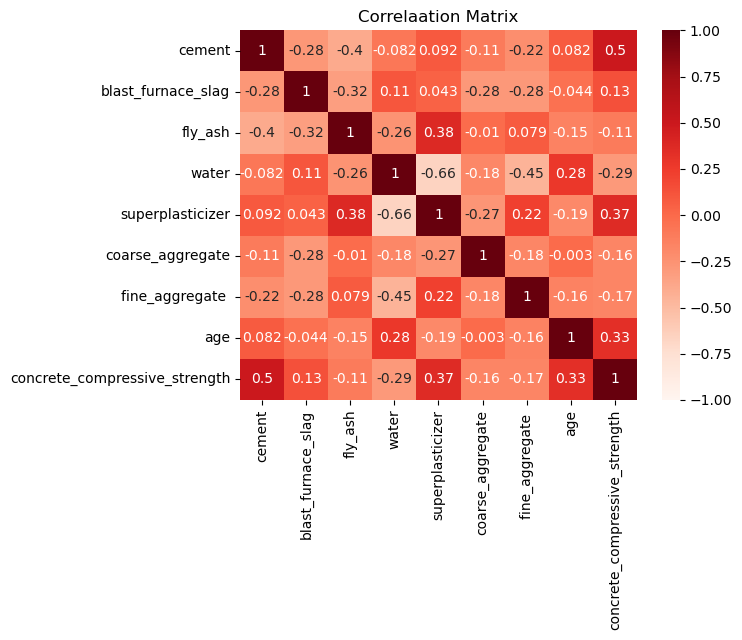

In [8]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---->['concrete_compressive_strength']
sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlaation Matrix')
plt.show()

In [10]:
#Understanding Features and create New Features Based on Existing Features-------> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [12]:
df['composite_ratio']=(df['cement']+df['superplasticizer']+df['blast_furnace_slag'])/(df['water'])
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,composite_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.723958
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2.033599


In [13]:
df['Cement_to_Water_Ratio']=df['cement']/df['water']

In [14]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
composite_ratio                  0.620196
Cement_to_Water_Ratio            0.559522
Name: concrete_compressive_strength, dtype: float64

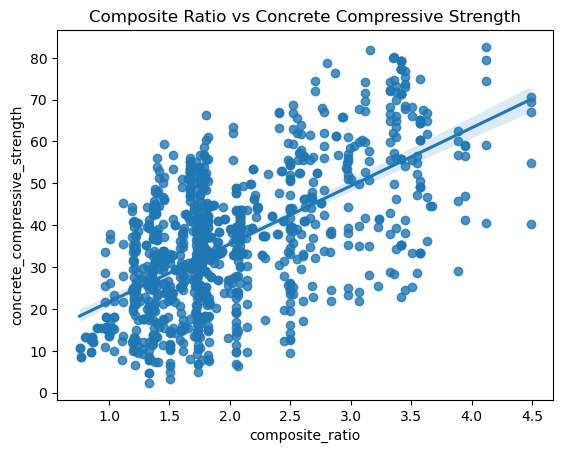

In [16]:
sns.regplot(x=df['composite_ratio'],y=df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

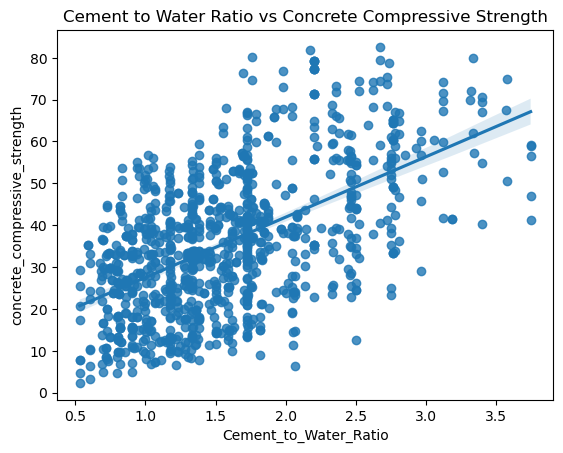

In [17]:
sns.regplot(x=df['Cement_to_Water_Ratio'],y=df['concrete_compressive_strength'])
plt.title("Cement to Water Ratio vs Concrete Compressive Strength")
plt.show()

### STEP 4: **1.Splitting the dataset into Training and Testing Datasets.Also Using Train and Test split to Prevent data Leakage**

In [20]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()

LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

r2_score_LR = r2_score(y_test,y_pred_LR)
r2_score_LR 

0.5941935306287758